In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

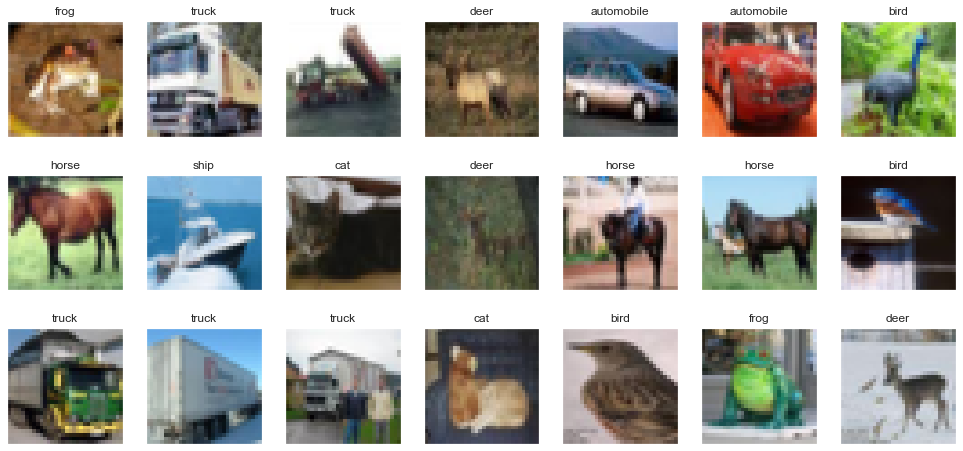

In [4]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [5]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

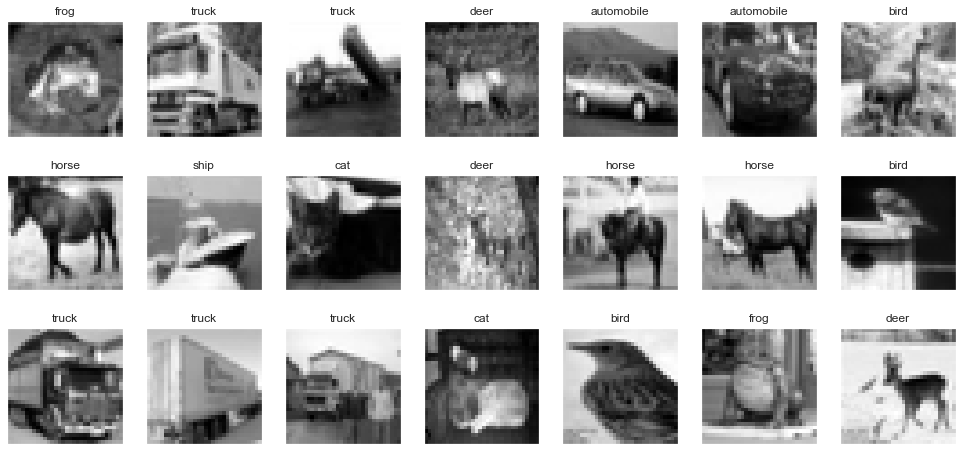

In [6]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [7]:
X_train  = X_train/255
X_test  = X_test/255

In [8]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [9]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [11]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [12]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', 
     optimizer='nadam',
     metrics=['acc'])

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 30s 17ms/step - loss: 1.6700 - acc: 0.3847 - val_loss: 1.2869 - val_acc: 0.5412
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1782 - acc: 0.5847 - val_loss: 1.0109 - val_acc: 0.6466
Epoch 3/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9811 - acc: 0.6604 - val_loss: 0.9123 - val_acc: 0.6822
Epoch 4/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8691 - acc: 0.6980 - val_loss: 0.9209 - val_acc: 0.6863
Epoch 5/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7829 - acc: 0.7291 - val_loss: 0.8388 - val_acc: 0.7155
Epoch 6/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7180 - acc: 0.7521 - val_loss: 0.8435 - val_acc: 0.7140
Epoch 7/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6656 - acc: 0.7692 - val_loss: 0.8467 - val_acc: 0.7140
Epoch 8/20
1563/1563 [==========================

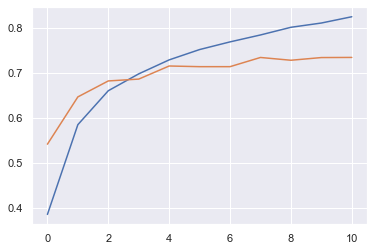

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

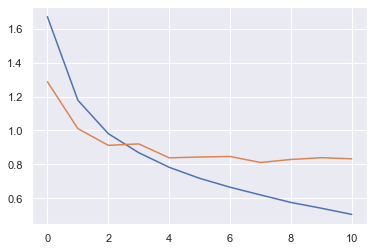

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [18]:
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)

In [19]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [20]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

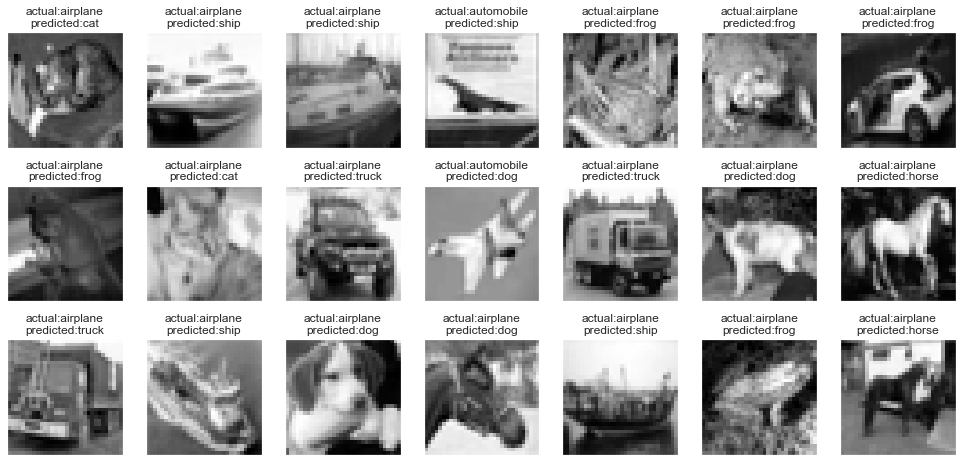

In [21]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()